Given a set of $k + 1$ data points

 $\begin{align*}
(x_0,y_0),\,(x_1,y_1),\,(x_2,y_2),\,\dots,\, (x_j,y_j),\,\dots,\,(x_k,y_k)
\end{align*}$


where no two $x_j$ are the same.

# Lagrange polynomials
https://en.wikipedia.org/wiki/Lagrange_polynomial

$$ L(x) := \sum_{j=0}^{k} y_j l_j(x)$$

$$l_j(x) := \prod_{m = 0 \\ m \neq j}^{k} \frac{x-x_m}{x_j-x_m}= \frac{(x-x_0)}{(x_j-x_0)} \dots \frac{(x-x_{j-1})}{(x_j-x_{j-1})} \frac{(x-x_{j+1})}{(x_j-x_{j+1})} \dots\frac{(x-x_k)}{(x_j-x_k)} $$

## Julia Code

In [21]:
mutable struct lagrangeInterpolator
    points::Array{Float64,1}
    data::Array{Float64,1}
    dataNum::UInt32
    
    function lagrangeInterpolator(points::Array{Float64,1},  data::Array{Float64,1})
        this = new()
        this.points = points
        this.data = data
        this.dataNum = length(this.data)
        return this
    end
    
end

function interpolate(interpolator::lagrangeInterpolator,queryPoint::Float64)
    retrunValue = 0.0
    for i = 1 : interpolator.dataNum
        mulSum = interpolator.data[i]
        for j = 1 : interpolator.dataNum
            if i != j
                mulSum *= (queryPoint-interpolator.points[j])/(interpolator.points[i]-interpolator.points[j])
            end
        end
        retrunValue += mulSum
    end
    return retrunValue
end

function interpolate(interpolator::lagrangeInterpolator,queryPoints::Array{Float64,1})
    retrunValues = Array{Float64,1}(undef, length(queryPoints))
    for i = 1 : length(queryPoints)
        retrunValues[i] = interpolate(interpolator, queryPoints[i])
    end
    return retrunValues
end

interpolate (generic function with 2 methods)

In [83]:
points = [32.0, 22.2, 41.6, 10.1, 50.5]
data = [0.52992, 0.37784, 0.66393, 0.17537, 0.63608]

queryPoints = [10.1:0.5:50.5...]

LAInterpolator = lagrangeInterpolator(points, data)

values = interpolate(LAInterpolator, queryPoints)


81-element Array{Float64,1}:
 0.17537
 0.18672305595097005
 0.19761620319439419
 0.2080825084051641
 0.21815396115687138
 0.22786147392180808
 0.2372348820709668
 0.24630294387403992
 0.2550933404994205
 0.26363267601420226
 0.271946477384178
 0.28005919447384203
 0.28799420004638854
 ⋮
 0.681125246280954
 0.6818853752098295
 0.6819403163495577
 0.6812488163853514
 0.6797685449011213
 0.6774560943794802
 0.6742669802017409
 0.6701556406479154
 0.6650754368967179
 0.6589786530255609
 0.6518164960105584
 0.6435390957265243

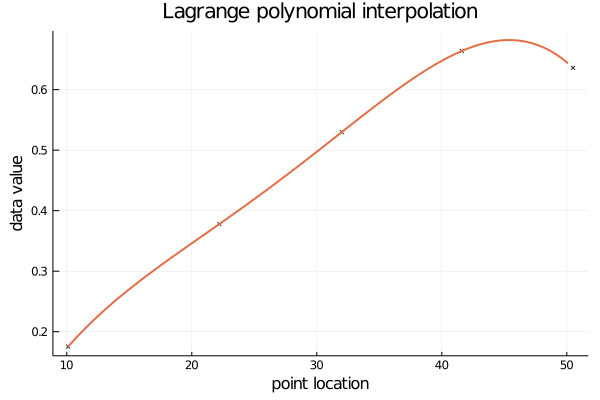

In [85]:
using Plots

plot(points, data, seriestype=:scatter, 
                   markershape = :xcross, 
                   markersize = 2,   
                   markercolor = :black,  
                   legend = false)

plot!(queryPoints, values, xlabel="point location",
                           ylabel="data value", 
                           title="Lagrange polynomial interpolation",
                           linewidth=2,
                           legend = false)

# Newton polynomial
https://en.wikipedia.org/wiki/Newton_polynomial

$$ N(x) := \sum_{j=0}^{k} a_j n_j(x)$$
where $ n_j(x) $ is the Newton basis polynomials
$$ n_j(x) :=  \prod_{i = 0}^{j-1} (x-x_i) $$
and the coefficients $a_j$ are defined as
$$ a_j := [y_0,\,\dots,\,y_j]$$
the notation for [divided differences](https://en.wikipedia.org/wiki/Divided_differences).

## Julia Code

In [48]:
function forwardDividedDifference(points::Array{Float64,1},  data::Array{Float64,1})
    if (length(points)==1)
        return data[1]
    else
        return (forwardDividedDifference(points[2:end], data[2:end])-
                forwardDividedDifference(points[1:end-1], data[1:end-1]))/(points[end] - points[1])
    end
end

forwardDividedDifference (generic function with 1 method)

In [72]:
mutable struct newtonInterpolator
    points::Array{Float64,1}
    data::Array{Float64,1}
    dataNum::UInt32
    
    function newtonInterpolator(points::Array{Float64,1},  data::Array{Float64,1})
        this = new()
        this.points = points
        this.data = data
        this.dataNum = length(this.data)
        return this
    end
    
end

function interpolate(interpolator::newtonInterpolator,queryPoint::Float64)
    retrunValue = 0.0
    for i = 1 : interpolator.dataNum
        mulSum = 1
        for j = 1 : i-1
            mulSum *= (queryPoint-interpolator.points[j])
        end
        mulSum *= forwardDividedDifference(interpolator.points[1:i], interpolator.data[1:i])
        retrunValue += mulSum
    end
    return retrunValue
end

function interpolate(interpolator::newtonInterpolator,queryPoints::Array{Float64,1})
    retrunValues = Array{Float64,1}(undef, length(queryPoints))
    for i = 1 : length(queryPoints)
        retrunValues[i] = interpolate(interpolator, queryPoints[i])
    end
    return retrunValues
end

interpolate (generic function with 4 methods)

In [78]:
points2 = [32.0, 22.2, 41.6, 10.1, 50.5]
data2 =  [0.52992, 0.37784, 0.66393, 0.17537, 0.63608]

queryPoints2 = [10.1:0.5:50.5...]

sortedPoints, sortedData = getindex.((points2, data2), (sortperm(points2),))

NTInterpolator = newtonInterpolator(sortedPoints, sortedData)

values2 = interpolate(NTInterpolator, queryPoints2)

81-element Array{Float64,1}:
 0.17537
 0.18672305595097013
 0.1976162031943943
 0.20808250840516415
 0.21815396115687144
 0.2278614739218082
 0.23723488207096682
 0.24630294387404
 0.25509334049942073
 0.26363267601420226
 0.2719464773841781
 0.2800591944738421
 0.2879942000463884
 ⋮
 0.6811252462809538
 0.6818853752098294
 0.6819403163495579
 0.6812488163853513
 0.6797685449011212
 0.6774560943794802
 0.6742669802017407
 0.6701556406479156
 0.6650754368967178
 0.6589786530255608
 0.6518164960105584
 0.6435390957265245

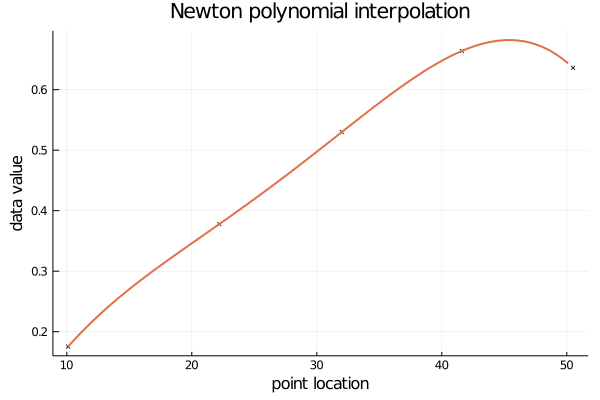

In [86]:
using Plots

plot(sortedPoints, sortedData, seriestype=:scatter, 
                   markershape = :xcross, 
                   markersize = 2,   
                   markercolor = :black,  
                   legend = false)

plot!(queryPoints2, values2, xlabel="point location",
                           ylabel="data value", 
                           title="Newton polynomial interpolation",
                           linewidth=2,
                           legend = false)